In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as tdata
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [3]:
train_frame=pd.read_csv('./data/titanic/train.csv')
test_frame=pd.read_csv('./data/titanic/test.csv')


train_frame=train_frame[['Survived','Pclass','Sex','Age']]
test_frame=test_frame[['Pclass','Sex','Age']]

MAXPCLASS=3
MAXXAGE=100

In [30]:
class Dataset(tdata.Dataset):
    def __init__(self,frame):
        self.survived=[]
        self.pclass=[]
        self.sex=[]
        self.age=[]
        for data in frame:
            self.survived.append(data[0])
            self.pclass.append(data[1]/MAXPCLASS)
            if data[2] == 'male':
                self.sex.append(1)
            else:
                self.sex.append(0)
            if data[3]!=data[3]:
                self.age.append(-1)
            else:
                self.age.append(data[3]/MAXXAGE)
            
    
    def __getitem__(self,id):
        return torch.tensor([self.pclass[id], self.sex[id], self.age[id]],dtype=torch.float32) , torch.tensor(self.survived[id])
        
    def __len__(self):
        return len(self.pclass)
    

In [31]:
data_array=train_frame.to_numpy()

train_array=data_array[:891-150]
valid_array=data_array[891-150:]

train_data=tdata.DataLoader(Dataset(train_array),batch_size=20)

valid_data=tdata.DataLoader(Dataset(valid_array),batch_size=50)



In [6]:
class NNet(nn.Module):
    def __init__(self):
        super(NNet,self).__init__()
        self.linear1=nn.Linear(3,8)
        #nn.init.xavier_normal_(self.linear1.weight)
        self.linear2=nn.Linear(8,2)

    def forward(self,x):
        x=torch.tanh(self.linear1(x))
        x=self.linear2(x)
        return x
    

In [38]:
model=NNet()

criterion= nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)



In [37]:
print(model.linear1.state_dict())

OrderedDict([('weight', tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]])), ('bias', tensor([nan, nan, nan, nan, nan, nan, nan, nan]))])


  2%|▏         | 1/50 [00:15<13:02, 15.98s/it]

Accuracy:  0.8133333333333334


  4%|▍         | 2/50 [00:23<08:59, 11.24s/it]

Accuracy:  0.8


  6%|▌         | 3/50 [00:26<05:32,  7.08s/it]

Accuracy:  0.8


  8%|▊         | 4/50 [00:26<03:28,  4.53s/it]

Accuracy:  0.8


 10%|█         | 5/50 [00:27<02:22,  3.17s/it]

Accuracy:  0.8


 16%|█▌        | 8/50 [00:30<01:09,  1.66s/it]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 20%|██        | 10/50 [00:30<00:40,  1.01s/it]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 28%|██▊       | 14/50 [00:31<00:16,  2.17it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 32%|███▏      | 16/50 [00:31<00:11,  3.01it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 40%|████      | 20/50 [00:31<00:05,  5.02it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 44%|████▍     | 22/50 [00:31<00:04,  6.07it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 52%|█████▏    | 26/50 [00:32<00:03,  7.74it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 56%|█████▌    | 28/50 [00:32<00:02,  8.72it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 64%|██████▍   | 32/50 [00:32<00:01,  9.68it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666


 68%|██████▊   | 34/50 [00:33<00:01, 10.05it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.7866666666666666
Accuracy:  0.7933333333333333


 76%|███████▌  | 38/50 [00:33<00:01, 10.41it/s]

Accuracy:  0.7933333333333333
Accuracy:  0.7933333333333333
Accuracy:  0.7933333333333333


 80%|████████  | 40/50 [00:33<00:00, 10.64it/s]

Accuracy:  0.7866666666666666
Accuracy:  0.8
Accuracy:  0.7933333333333333


 88%|████████▊ | 44/50 [00:33<00:00, 11.41it/s]

Accuracy:  0.7933333333333333
Accuracy:  0.7866666666666666
Accuracy:  0.8


 92%|█████████▏| 46/50 [00:34<00:00, 11.26it/s]

Accuracy:  0.8
Accuracy:  0.7933333333333333
Accuracy:  0.7933333333333333


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]

Accuracy:  0.78
Accuracy:  0.7733333333333333
Accuracy:  0.7733333333333333


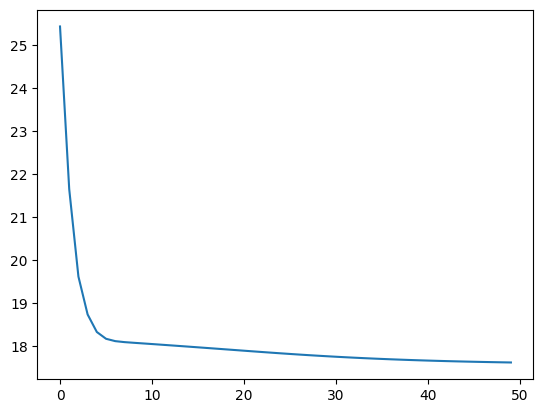

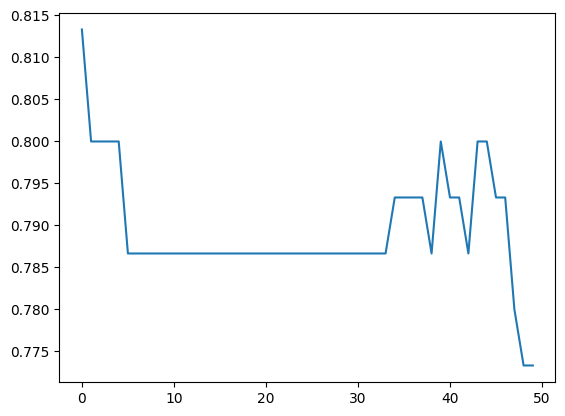

In [39]:
EPOCHS=[]
LOSS=[]

ACCURACY=[]

tloss=100


#epoch=1
for epoch in tqdm(range(50)):
#while tloss>5:
    model.train()
    tloss=0
    for x,y in train_data:
        optimizer.zero_grad()
        py=model(x)
        loss=criterion(py,y)
        loss.backward()
        optimizer.step()

        tloss+=loss.item()
    
    accuracy=0
    model.eval()
    for x,y in valid_data:
        py=torch.tanh(model.linear1(x))
        py=model(x)
        id=0
        for val in py:
            if torch.argmax(val)==y[id]:
                accuracy+=1
            id+=1

    accuracy/=len(valid_array)
    print("Accuracy: ",accuracy)
    #print('Loss: '+str(tloss))
    #print('Epoch: '+str(epoch))
    ACCURACY.append(accuracy)
    EPOCHS.append(epoch)
    LOSS.append(tloss)
    epoch+=1
    


plt.plot(EPOCHS,LOSS)
plt.show()
plt.plot(EPOCHS,ACCURACY)
plt.show()
